# Iris 모델

In [1]:
import pandas as pd 
import joblib

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### 데이터셋

In [3]:
df_train = pd.read_csv('../static/data/iris_train.csv')
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.3,1.7,0.5,0
1,6.1,3.0,4.9,1.8,2
2,5.1,3.4,1.5,0.2,0
3,5.1,3.5,1.4,0.3,0
4,5.2,3.4,1.4,0.2,0


In [4]:
y_train = df_train.target.values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.drop(columns='target', axis=1))
X_train.shape, y_train.shape

((112, 4), (112,))

In [5]:
df_test = pd.read_csv('../static/data/iris_test.csv')
y_test = df_test.target.values
X_test = scaler.fit_transform(df_test.drop(columns='target', axis=1))
X_test.shape, y_test.shape

((38, 4), (38,))

In [6]:
lr_clf = LogisticRegression()
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [7]:
params = {
    'C': [3, 4, 5, 6, 7]
}

In [8]:
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9739
최적 파라미터: {'C': 4}


In [9]:
best_lr = grid_cv.best_estimator_
pred = best_lr.predict(X_test)
accuracy_score(y_test, pred)

0.9210526315789473

In [10]:
joblib.dump(best_lr, '../static/model/iris_lr.pkl')

['../static/model/iris_lr.pkl']

### 2. SVM

In [11]:
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [12]:
params = {
    'C' : [2, 3, 4, 5, 6, 7]
}

In [13]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9826
최적 파라미터: {'C': 3}


In [14]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test)
accuracy_score(y_test, pred)

0.9210526315789473

In [15]:
joblib.dump(best_sv, '../static/model/iris_sv.pkl')

['../static/model/iris_sv.pkl']

### 3. Random Forest

In [16]:
rf_clf = RandomForestClassifier()
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
params = {
    'max_depth': [1, 5, 7, 10],
    'min_samples_split': [3, 4, 5]
}

In [18]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9826
최적 파라미터: {'max_depth': 10, 'min_samples_split': 3}


In [19]:
best_rf = grid_cv.best_estimator_
pred = best_rf.predict(X_test)
accuracy_score(y_test, pred)

0.9210526315789473

In [20]:
joblib.dump(best_rf, '../static/model/iris_rf.pkl')

['../static/model/iris_rf.pkl']

### PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [22]:
df_total = pd.concat([df_train, df_test])
df = df_total.iloc[:, :-1]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)

pca_array = pca.fit_transform(X_scaled)
print(pca_array.shape)

(150, 2)


In [50]:
df_total.iloc[:, -1]

0     0
1     2
2     0
3     0
4     0
     ..
33    2
34    0
35    2
36    0
37    2
Name: target, Length: 150, dtype: int64

In [25]:
df_PC = pd.DataFrame(pca_array, columns=['pca_x', 'pca_y'])
df_PC['target'] = df_total.iloc[:, -1].values

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

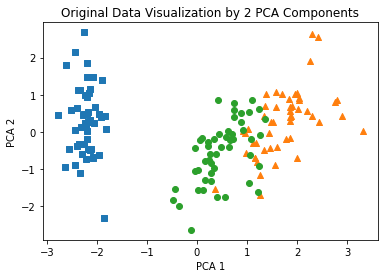

In [28]:
markers = ['s', 'o', '^', 'P', 'D', 'H', 'x']
plt.figure()
for i in df_PC.target.unique():
    marker = markers[i]
    x_axis_data = df_PC[df_PC.target == i]['pca_x']
    y_axis_data = df_PC[df_PC.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title('Original Data Visualization by 2 PCA Components')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()

In [29]:
df_total.target

0     0
1     2
2     0
3     0
4     0
     ..
33    2
34    0
35    2
36    0
37    2
Name: target, Length: 150, dtype: int64

In [30]:
iris_pca_df = pd.DataFrame(data=pca_array, columns=['pca_x', 'pca_y'])
iris_pca_df['species'] = df_total.target.values
iris_pca_df.head()

,pca_x,pca_y,species
0,-1.818670,0.085559,0
1,1.020951,0.064346,2
2,-2.169711,0.268879,0
3,-2.190350,0.488838,0
4,-2.139563,0.313218,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        iris_pca_df[['pca_x', 'pca_y']], df_total.target.values, stratify=df_total.target.values,
        test_size=0.25, random_state=2021
)

In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.8157894736842105

In [33]:
joblib.dump(best_rf, '../static/model/iris_pc.pkl')

['../static/model/iris_pc.pkl']